## Mathematical Modeling and Computation in Finance

#####  Characteristic function and density for normal(10,1)

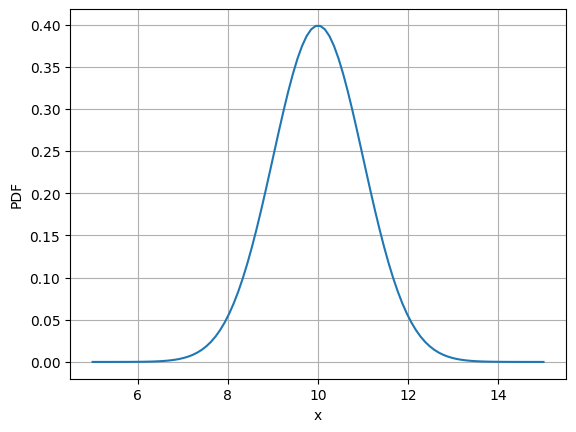

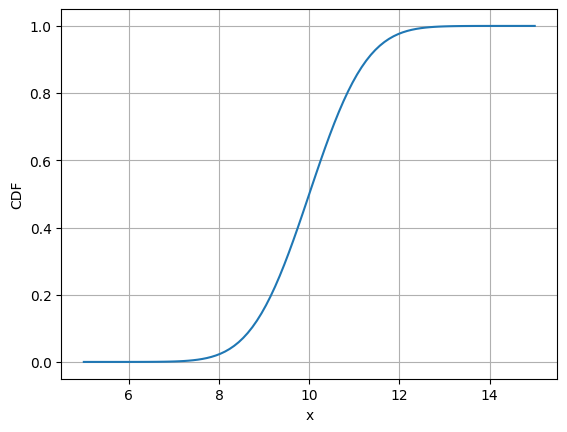

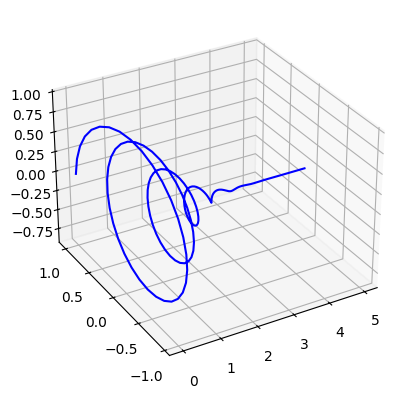

In [ ]:

# Characteristic function and density for normal(10,1)

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from mpl_toolkits import mplot3d

def plotNormalPDF_CDF_CHF():
    mu    = 10.0
    sigma = 1.0
    i     = complex(0,1)
    chf   = lambda u: np.exp(i * mu * u - sigma * sigma * u * u / 2.0)
    pdf   = lambda x: st.norm.pdf(x,mu,sigma)
    cdf   = lambda x: st.norm.cdf(x,mu,sigma)

    x = np.linspace(5,15,100)
    u = np.linspace(0,5,250)

    # Figure 1, PDF

    plt.figure(1)
    plt.plot(x,pdf(x))
    plt.grid()
    plt.xlabel('x')
    plt.ylabel('PDF')

    # Figure 2, CDF

    plt.figure(2)
    plt.plot(x,cdf(x))
    plt.grid()
    plt.xlabel('x')
    plt.ylabel('CDF')

    # Figure 3, CHF

    plt.figure(3)
    ax = plt.axes(projection='3d')
    chfV = chf(u)

    x = np.real(chfV)
    y = np.imag(chfV)
    ax.plot3D(u, x, y, 'blue')
    ax.view_init(30, -120)

    plt.show()

plotNormalPDF_CDF_CHF()

The CDF, PDF and characteristic function for an N (10, 1) random variable.



---



## Characteristic Function (CF)

Simply Put, a characteristic function is just another way to represent the distribution of a random variable.

What this means:

The PDF tells you “how likely each value is.”
The CDF tells you “the probability the variable is less than x.”

The Characteristic Function tells you the same information, but encoded using a Fourier transform.

Definition (simple):

𝜙𝑋(𝑢)=𝐸[𝑒^𝑖𝑢𝑋]
Even though it looks abstract, the amazing fact is:

The characteristic function contains all information about the distribution.
You can reconstruct the PDF or CDF from it.

## Why do we use characteristic functions in finance?

Because for many important stochastic processes like Heston model, Lévy processes, stochastic volatility models, we cannot compute the density function explicitly, but we can compute the characteristic function.

This is why they are essential in:

option pricing via Fourier transforms (Carr–Madan, FFT)
solving stochastic differential equations
deriving expectations and variances
computing risk measures

We use density functions to compute expectations in finance. But for many realistic models (stochastic volatility), the density is unknown or too hard to compute.

The characteristic function is easier to compute than the density.
Even if the density is unknown, sometimes: the characteristic function or the moment-generating function (MGF), can be derived in closed form.

This is extremely valuable because, The characteristic function uniquely determines the distribution. If you know φ(u), you know everything about X.

You can get moments by differentiating the characteristic function.

For example:
First derivative → mean
Second derivative → variance
Third derivative → skewness
Fourth derivative → kurtosis
This is why CFs are so powerful mathematically.

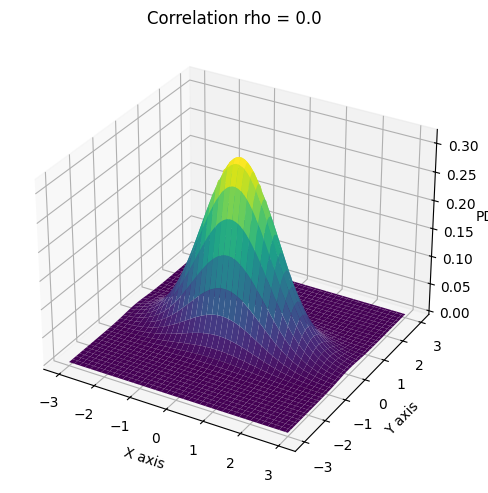

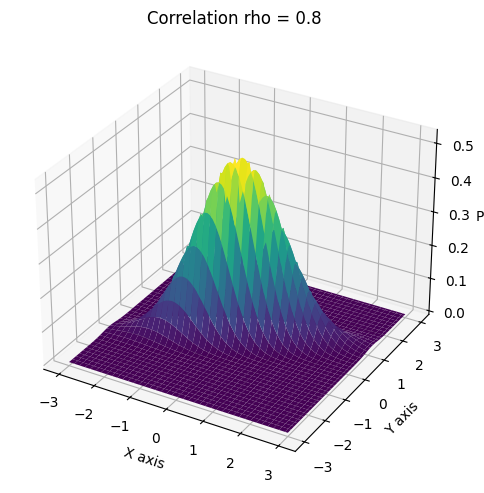

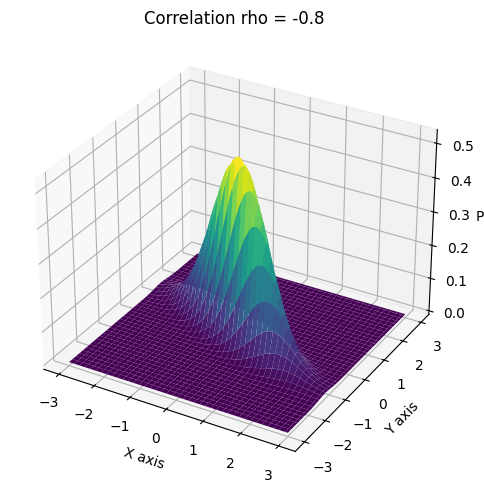

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 (required for 3D projection)

def BivariateNormalPDFPlot():
    # Grid resolution
    n = 80

    # Parameters
    mu_1, mu_2 = 0.0, 0.0
    sigma_1, sigma_2 = 1.0, 0.5
    rho_vals = [0.0, 0.8, -0.8]  # correlations (must be in [-1, 1])

    # Grid
    x = np.linspace(-3.0, 3.0, n)
    y = np.linspace(-3.0, 3.0, n)
    X, Y = np.meshgrid(x, y)
    pos = np.empty(X.shape + (2,))
    pos[:, :, 0] = X
    pos[:, :, 1] = Y

    def rv_from_rho(rho):
        # Proper covariance matrix
        cov = [[sigma_1**2, rho * sigma_1 * sigma_2],
               [rho * sigma_1 * sigma_2, sigma_2**2]]
        mean = [mu_1, mu_2]
        return multivariate_normal(mean=mean, cov=cov, allow_singular=False)

    # Plot each rho
    for i, rho in enumerate(rho_vals, start=1):
        fig = plt.figure(i, figsize=(6, 5))
        ax = fig.add_subplot(111, projection='3d')
        ax.plot_surface(X, Y, rv_from_rho(rho).pdf(pos), linewidth=0, cmap='viridis', antialiased=True)
        ax.set_title(f"Correlation rho = {rho}")
        ax.set_xlabel("X axis")
        ax.set_ylabel("Y axis")
        ax.set_zlabel("PDF")
        plt.tight_layout()
        plt.show()

BivariateNormalPDFPlot()

Examples of two-dimensional normal probability density functions, with
ρ = 0 (first), ρ = 0.8 (second) and ρ = −0.8 (third).

## Stochastic processes, martingale property

We often work with stochastic processes for the financial asset prices, and give some basic definitions for them here.
A stochastic process, X(t), is a collection of random variables indexed by a
time variable t. Suppose we have a set of calendar dates/days, T1, T2, . . . , Tm. Up to today, we have observed certain state values of the stochastic process X(t).The past is known, and we therefore “see” the historical asset path. For the future we do not know the precise path but we may simulate the future according to some asset price distribution

Estimated parameters: mu = 0.001162, sigma = 0.041484
NoOfSteps = 160
NoOfPaths = 10


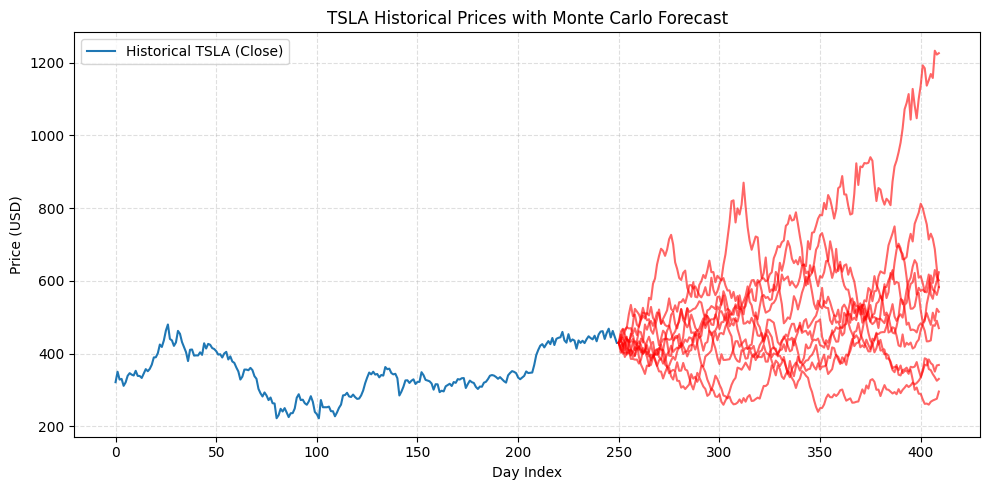

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf


def fetch_tsla(period="1y", interval="1d") -> pd.Series:
    """
    Fetch TSLA daily Close prices from Yahoo Finance.
    Returns a clean pandas Series (index = date, values = price).
    """
    df = yf.download("TSLA", period=period, interval=interval, auto_adjust=False, progress=False)
    if df.empty or "Close" not in df:
        raise ValueError("Failed to download TSLA data.")
    s = df["Close"].dropna().astype(float)
    return s


def MLE_and_forecast(S: pd.Series,
                     NoOfPaths: int = 10,
                     NoOfSteps: int = 160,
                     seed: int = 42):
    """
    Perform MLE for drift (mu) and volatility (sigma) on log-prices,
    then simulate forward log-price paths and plot.
    """

    # Use integer time steps (daily dt=1)
    dateS = np.arange(len(S), dtype=int)
    X = np.log(S.values)

    # MLE estimates
    dt = 1.0
    m = len(dateS)(consistent with your original code)
    mu = (X[-1] - X[0]) / (m * dt)

    # volatility estimate from residuals of increments minus drift
    ssum = 0.0
    for i in range(len(X) - 1):
        ssum += (X[i + 1] - X[i] - mu * dt) ** 2
    sigma = np.sqrt(ssum / (m * dt))

    # Convert mu and sigma to scalar floats for printing
    mu_scalar = mu.item() if isinstance(mu, np.ndarray) else mu
    sigma_scalar = sigma.item() if isinstance(sigma, np.ndarray) else sigma

    print(f"Estimated parameters: mu = {mu_scalar:.6f}, sigma = {sigma_scalar:.6f}")
    print(f"NoOfSteps = {NoOfSteps}")
    print(f"NoOfPaths = {NoOfPaths}")

    # Plot historical series
    plt.figure(figsize=(10, 5))
    plt.plot(dateS, S.values, label="Historical TSLA (Close)")
    plt.grid(True, linestyle="--", alpha=0.4)
    plt.xlabel("Day Index")
    plt.ylabel("Price (USD)")
    plt.title("TSLA Historical Prices with Monte Carlo Forecast")

    # Monte Carlo simulation (from last observed log-price)
    rng = np.random.default_rng(seed)
    Z = rng.normal(0.0, 1.0, size=(NoOfPaths, NoOfSteps))
    # Normalize each step's shocks to mean 0, std 1 (as in your original code)
    Z = (Z - Z.mean(axis=0, keepdims=True)) / (Z.std(axis=0, keepdims=True) + 1e-12)

    Xsim = np.zeros((NoOfPaths, NoOfSteps))
    Xsim[:, 0] = X[-1]  # start at last observed log price

    for i in range(NoOfSteps - 1):
        Xsim[:, i + 1] = Xsim[:, i] + mu_scalar * dt + sigma_scalar * np.sqrt(dt) * Z[:, i]

    Ssim = np.exp(Xsim)

    # Plot simulated paths continuing after the last day
    future_t = np.arange(dateS[-1] + 1, dateS[-1] + 1 + NoOfSteps, dtype=int)
    for p in range(NoOfPaths):
        plt.plot(future_t, Ssim[p, :], "-r", alpha=0.6)

    plt.legend(loc="best")
    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    # Fetch 1 year of daily TSLA closes; adjust period as you like (e.g., "2y")
    tsla_close = fetch_tsla(period="1y", interval="1d")
    MLE_and_forecast(tsla_close, NoOfPaths=10, NoOfSteps=160, seed=42)

Past and present in an asset price setting. We do not know the precise
future asset path but we may simulate it according to some price distribution.

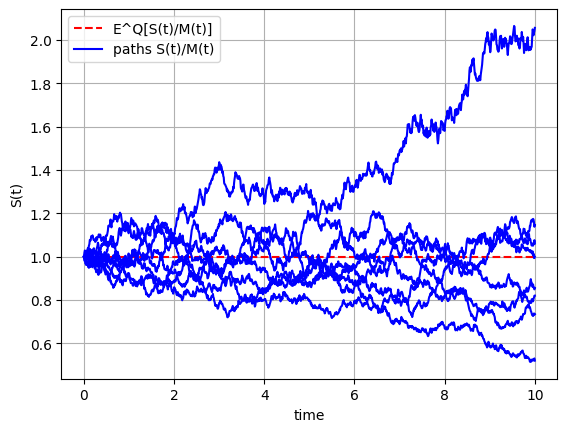

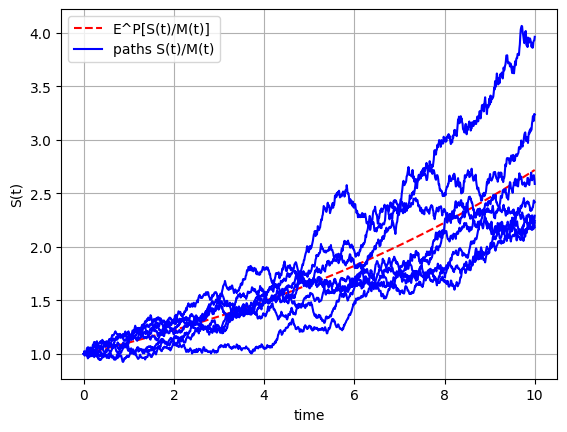

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def GeneratePathsGBM(NoOfPaths,NoOfSteps,T,r,sigma,S_0):
    Z = np.random.normal(0.0,1.0,[NoOfPaths,NoOfSteps])
    X = np.zeros([NoOfPaths, NoOfSteps+1])
    S = np.zeros([NoOfPaths, NoOfSteps+1])
    time = np.zeros([NoOfSteps+1])

    X[:,0] = np.log(S_0)

    dt = T / float(NoOfSteps)
    for i in range(0,NoOfSteps):

        # Making sure that samples from a normal have mean 0 and variance 1

        if NoOfPaths > 1:
            Z[:,i] = (Z[:,i] - np.mean(Z[:,i])) / np.std(Z[:,i])

        X[:,i+1] = X[:,i] + (r - 0.5 * sigma * sigma) * dt + sigma *\
        np.power(dt, 0.5)*Z[:,i]
        time[i+1] = time[i] +dt

    # Compute exponent of ABM

    S = np.exp(X)
    paths = {"time":time,"S":S}
    return paths

def MainCode():
    NoOfPaths = 8
    NoOfSteps = 1000
    S_0       = 1
    r         = 0.05
    mu        = 0.15
    sigma     = 0.1
    T         = 10

    # Money-savings account

    M = lambda t: np.exp(r * t)

    # Monte Carlo paths

    pathsQ    = GeneratePathsGBM(NoOfPaths,NoOfSteps,T,r,sigma,S_0)
    S_Q       = pathsQ["S"]
    pathsP = GeneratePathsGBM(NoOfPaths,NoOfSteps,T,mu,sigma,S_0)
    S_P = pathsP["S"]
    time= pathsQ["time"]

    # Discounted stock paths

    S_Qdisc = np.zeros([NoOfPaths,NoOfSteps+1])
    S_Pdisc = np.zeros([NoOfPaths,NoOfSteps+1])
    i = 0
    for i, ti in enumerate(time):
        S_Qdisc[:, i] = S_Q[:,i]/M(ti)
        S_Pdisc[:, i] = S_P[:,i]/M(ti)

    # S(T)/M(T) with stock growing with rate r

    plt.figure(1)
    plt.grid()
    plt.xlabel("time")
    plt.ylabel("S(t)")
    eSM_Q = lambda t: S_0 * np.exp(r *t) / M(t)
    plt.plot(time,eSM_Q(time),'r--')
    plt.plot(time, np.transpose(S_Qdisc),'blue')
    plt.legend(['E^Q[S(t)/M(t)]','paths S(t)/M(t)'])

    # S(T)/M(T) with stock growing with rate mu

    plt.figure(2)
    plt.grid()
    plt.xlabel("time")
    plt.ylabel("S(t)")
    eSM_P = lambda t: S_0 * np.exp(mu *t) / M(t)
    plt.plot(time,eSM_P(time),'r--')
    plt.plot(time, np.transpose(S_Pdisc),'blue')
    plt.legend(['E^P[S(t)/M(t)]','paths S(t)/M(t)'])

    plt.show()

MainCode()

In [3]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf


def fetch_tsla(period="1y", interval="1d") -> pd.Series:
    """
    Fetch TSLA daily Close prices from Yahoo Finance.
    Returns a clean pandas Series (index = date, values = price).
    """
    df = yf.download("TSLA", period=period, interval=interval, auto_adjust=False, progress=False)

#  Perform MLE for drift (mu) and volatility (sigma) on log-prices, then simulate forward log-price paths and plot.
def MLE_and_forecast(S: pd.Series, NoOfPaths: int = 10,NoOfSteps: int = 160, seed: int = 42):

    # Use integer time steps (daily dt=1)
    dateS = np.arange(len(S), dtype=int)
    X = np.log(S.values)

    # MLE estimates
    dt = 1.0
    m = len(dateS)
    # drift estimate based on endpoints
    mu = (X[-1] - X[0]) / (m * dt)

    # volatility estimate from residuals of increments minus drift
    ssum = 0.0
    for i in range(len(X) - 1):
        ssum += (X[i + 1] - X[i] - mu * dt) ** 2
    sigma = np.sqrt(ssum / (m * dt))

    # Convert mu and sigma to scalar floats for printing
    mu_scalar = mu.item() if isinstance(mu, np.ndarray) else mu
    sigma_scalar = sigma.item() if isinstance(sigma, np.ndarray) else sigma

    print(f"Estimated parameters: mu = {mu_scalar:.6f}, sigma = {sigma_scalar:.6f}")
    print(f"NoOfSteps = {NoOfSteps}")
    print(f"NoOfPaths = {NoOfPaths}")

    plt.figure(figsize=(10, 5))
    plt.plot(dateS, S.values, label="Historical TSLA (Close)")
    plt.grid(True, linestyle="--", alpha=0.4)
    plt.xlabel("Day Index")
    plt.ylabel("Price (USD)")
    plt.title("TSLA Historical Prices with Monte Carlo Forecast")
# --- Monte Carlo simulation (from last observed log-price) ---
    rng = np.random.default_rng(seed)
    Z = rng.normal(0.0, 1.0, size=(NoOfPaths, NoOfSteps))
    # Normalize each step's shocks to mean 0, std 1 (as in your original code)
    Z = (Z - Z.mean(axis=0, keepdims=True)) / (Z.std(axis=0, keepdims=True) + 1e-12)

    Xsim = np.zeros((NoOfPaths, NoOfSteps))
    Xsim[:, 0] = X[-1]  # start at last observed log price

    for i in range(NoOfSteps - 1):
        Xsim[:, i + 1] = Xsim[:, i] + mu_scalar * dt + sigma_scalar * np.sqrt(dt) * Z[:, i]

    Ssim = np.exp(Xsim)

    # Plot simulated paths continuing after the last day
    future_t = np.arange(dateS[-1] + 1, dateS[-1] + 1 + NoOfSteps, dtype=int)
    for p in range(NoOfPaths):
        plt.plot(future_t, Ssim[p, :], "-r", alpha=0.6)

    plt.legend(loc="best")
    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    # Fetch 1 year of daily TSLA closes; adjust period as you like (e.g., "2y")
    tsla_close = fetch_tsla(period="1y", interval="1d")
    MLE_and_forecast(tsla_close, NoOfPaths=10, NoOfSteps=160, seed=42)

TypeError: object of type 'NoneType' has no len()

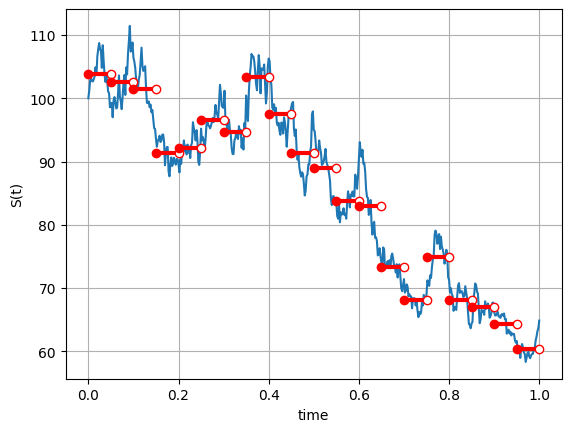

In [ ]:
"""
Created on Thu Dec 12 2018
Random step functions  and integration
@author: Lech A. Grzelak
"""
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import scipy.integrate as integrate

def GeneratePathsGBMABM(NoOfPaths,NoOfSteps,T,r,sigma,S_0):
    Z = np.random.normal(0.0,1.0,[NoOfPaths,NoOfSteps])
    X = np.zeros([NoOfPaths, NoOfSteps+1])
    time = np.zeros([NoOfSteps+1])

    X[:,0] = np.log(S_0)

    dt = T / float(NoOfSteps)
    for i in range(0,NoOfSteps):

        # Making sure that samples from a normal have mean 0 and variance 1

        if NoOfPaths > 1:
            Z[:,i] = (Z[:,i] - np.mean(Z[:,i])) / np.std(Z[:,i])
        X[:,i+1] = X[:,i] + (r - 0.5 * sigma * sigma) * dt + sigma * np.power(dt, 0.5)*Z[:,i]
        time[i+1] = time[i] +dt

    # Compute exponent of ABM

    S = np.exp(X)
    paths = {"time":time,"S":S}
    return paths

def mainCalculation():
    NoOfPaths = 1
    NoOfSteps = 500
    T         = 1
    r         = 0.05
    sigma     = 0.4
    S_0       = 100

    Paths = GeneratePathsGBMABM(NoOfPaths,NoOfSteps,T,r,sigma,S_0)
    timeGrid = Paths["time"]
    S = Paths["S"]

    plt.figure(1)
    plt.plot(timeGrid, np.transpose(S))
    plt.grid()
    plt.xlabel("time")
    plt.ylabel("S(t)")

    m          = 20
    pathNumber = 0
    f = interp1d(timeGrid, S[pathNumber,:])

    for k in range(1,m*T+1):
        tGrid = np.linspace(float((k-1))/m, float(k)/m, 100)
        g_m   = m * integrate.trapezoid(np.squeeze(f(tGrid)),np.squeeze(tGrid))
        plt.plot(tGrid,g_m * np.ones([len(tGrid),1]),'-r',linewidth=3.0)
        plt.plot(tGrid[0],g_m,'or')
        plt.plot(tGrid[-1],g_m,'or',markerfacecolor =[1,1,1])

    plt.show()

mainCalculation()

In [ ]:
#%%
"""
Created on Thu Nov 29 2018
Maximum Likelihood Estimation for the Tesla stock
@author: Lech A. Grzelak
"""
import numpy as np
import matplotlib.pyplot as plt

import MarketData

# Market Data - From MarketData.py
dateS = np.array(MarketData.dateS())
S     = np.array(MarketData.S())

print(type(dateS))
print(type(S))

def MLE(dateS,S):
    X     = np.log(S)
    plt.plot(dateS,S)
    plt.grid()
    plt.xlabel('days')
    plt.ylabel('Stock Value')

    # Maximum Likelihood Estimation of mu

    dt = 1
    m  = len(dateS)
    mu = 1/(m * dt) * (X[-1]-X[0])

    # Maximum Likelihood Estimation of sigma

    s = 0
    for i in range(0,len(X)-1):
        s = s + np.power(X[i+1]-X[i]-mu*dt,2)
    sigma = np.sqrt(s/(m*dt))
    print('Estimated parameters are: mu = {0} and sigma = {1}'.format(mu,sigma))

    # Monte Carlo simulation -- Forecasting

    NoOfPaths    = 10 # plot 10 paths
    NoOfSteps    = 160 # for about 0.5 year
    print(f'NoOfSteps = {NoOfSteps}')
    print(f'NoOfPaths = {NoOfPaths}')
    Z            =  np.random.normal(0.0,1.0,[NoOfPaths,NoOfSteps])
    Xsim         =  np.zeros([NoOfPaths,NoOfSteps])
    Xsim[:,0]    =  np.log(S[-1])

    for i in range(0,NoOfSteps-1):
        Z[:,i]         = (Z[:,i]-np.mean(Z[:,i]))/np.std(Z[:,i])
        Xsim[:,i+1]    = Xsim[:,i] + mu*dt + sigma*np.sqrt(dt)*Z[:,i]
    plt.plot(range(dateS[-1],dateS[-1]+NoOfSteps),np.exp(np.transpose(Xsim)),'-r')

    plt.show()


MLE(dateS,S)

ModuleNotFoundError: No module named 'MarketData'

Estimated parameters: mu = 0.002146, sigma = 0.042287
NoOfSteps = 160
NoOfPaths = 10


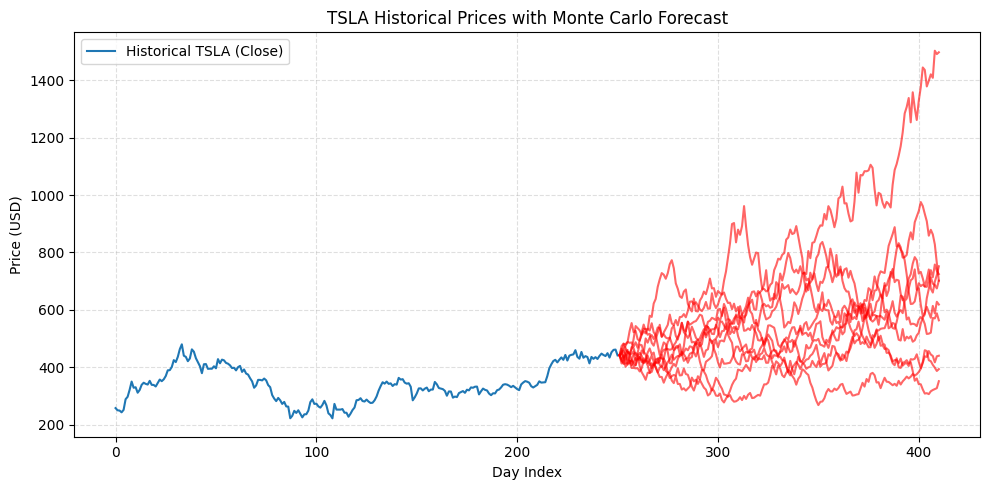

In [ ]:
# %%
"""
Maximum Likelihood Estimation for Tesla (TSLA) using real data (yfinance)
- Downloads daily close prices
- Estimates drift (mu) and volatility (sigma) via MLE on log-prices
- Simulates GBM-like log-price paths from the last observed price
- Plots historical series + 10 simulated paths
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# If yfinance isn't installed, uncomment the next line in notebooks:
# !pip install -q yfinance
import yfinance as yf


def fetch_tsla(period="1y", interval="1d") -> pd.Series:
    """
    Fetch TSLA daily Close prices from Yahoo Finance.
    Returns a clean pandas Series (index = date, values = price).
    """
    df = yf.download("TSLA", period=period, interval=interval, auto_adjust=False, progress=False)
    if df.empty or "Close" not in df:
        raise ValueError("Failed to download TSLA data.")
    s = df["Close"].dropna().astype(float)
    return s


def MLE_and_forecast(S: pd.Series,
                     NoOfPaths: int = 10,
                     NoOfSteps: int = 160,
                     seed: int = 42):
    """
    Perform MLE for drift (mu) and volatility (sigma) on log-prices,
    then simulate forward log-price paths and plot.
    """

    # Use integer time steps (daily dt=1) like the original code
    dateS = np.arange(len(S), dtype=int)
    X = np.log(S.values)

    # --- MLE estimates (following the original formula structure) ---
    dt = 1.0
    m = len(dateS)
    # drift estimate based on endpoints (consistent with your original code)
    mu = (X[-1] - X[0]) / (m * dt)

    # volatility estimate from residuals of increments minus drift
    ssum = 0.0
    for i in range(len(X) - 1):
        ssum += (X[i + 1] - X[i] - mu * dt) ** 2
    sigma = np.sqrt(ssum / (m * dt))

    # Convert mu and sigma to scalar floats for printing
    mu_scalar = mu.item() if isinstance(mu, np.ndarray) else mu
    sigma_scalar = sigma.item() if isinstance(sigma, np.ndarray) else sigma

    print(f"Estimated parameters: mu = {mu_scalar:.6f}, sigma = {sigma_scalar:.6f}")
    print(f"NoOfSteps = {NoOfSteps}")
    print(f"NoOfPaths = {NoOfPaths}")

    # --- Plot historical series ---
    plt.figure(figsize=(10, 5))
    plt.plot(dateS, S.values, label="Historical TSLA (Close)")
    plt.grid(True, linestyle="--", alpha=0.4)
    plt.xlabel("Day Index")
    plt.ylabel("Price (USD)")
    plt.title("TSLA Historical Prices with Monte Carlo Forecast")

    # --- Monte Carlo simulation (from last observed log-price) ---
    rng = np.random.default_rng(seed)
    Z = rng.normal(0.0, 1.0, size=(NoOfPaths, NoOfSteps))
    # Normalize each step's shocks to mean 0, std 1 (as in your original code)
    Z = (Z - Z.mean(axis=0, keepdims=True)) / (Z.std(axis=0, keepdims=True) + 1e-12)

    Xsim = np.zeros((NoOfPaths, NoOfSteps))
    Xsim[:, 0] = X[-1]  # start at last observed log price

    for i in range(NoOfSteps - 1):
        Xsim[:, i + 1] = Xsim[:, i] + mu_scalar * dt + sigma_scalar * np.sqrt(dt) * Z[:, i]

    Ssim = np.exp(Xsim)

    # Plot simulated paths continuing after the last day
    future_t = np.arange(dateS[-1] + 1, dateS[-1] + 1 + NoOfSteps, dtype=int)
    for p in range(NoOfPaths):
        plt.plot(future_t, Ssim[p, :], "-r", alpha=0.6)

    plt.legend(loc="best")
    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    # Fetch 1 year of daily TSLA closes; adjust period as you like (e.g., "2y")
    tsla_close = fetch_tsla(period="1y", interval="1d")
    MLE_and_forecast(tsla_close, NoOfPaths=10, NoOfSteps=160, seed=42)

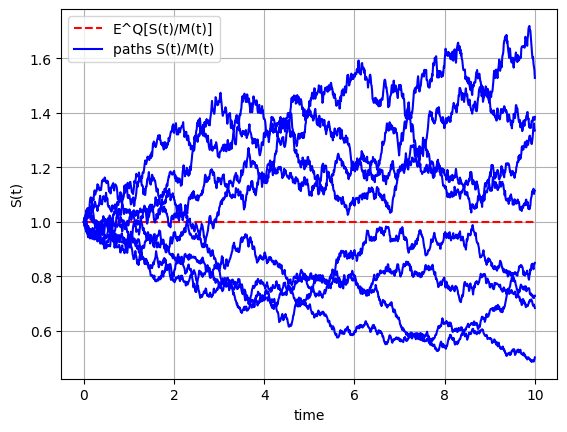

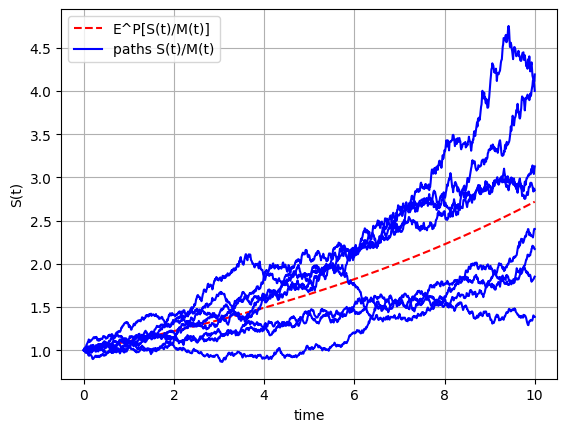

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

def GeneratePathsGBM(NoOfPaths,NoOfSteps,T,r,sigma,S_0):
    Z = np.random.normal(0.0,1.0,[NoOfPaths,NoOfSteps])
    X = np.zeros([NoOfPaths, NoOfSteps+1])
    S = np.zeros([NoOfPaths, NoOfSteps+1])
    time = np.zeros([NoOfSteps+1])

    X[:,0] = np.log(S_0)

    dt = T / float(NoOfSteps)
    for i in range(0,NoOfSteps):

        # Making sure that samples from a normal have mean 0 and variance 1

        if NoOfPaths > 1:
            Z[:,i] = (Z[:,i] - np.mean(Z[:,i])) / np.std(Z[:,i])

        X[:,i+1] = X[:,i] + (r - 0.5 * sigma * sigma) * dt + sigma *\
        np.power(dt, 0.5)*Z[:,i]
        time[i+1] = time[i] +dt

    # Compute exponent of ABM

    S = np.exp(X)
    paths = {"time":time,"S":S}
    return paths

def MainCode():
    NoOfPaths = 8
    NoOfSteps = 1000
    S_0       = 1
    r         = 0.05
    mu        = 0.15
    sigma     = 0.1
    T         = 10

    # Money-savings account

    M         = lambda t: np.exp(r * t)

    # Monte Carlo paths

    pathsQ    = GeneratePathsGBM(NoOfPaths,NoOfSteps,T,r,sigma,S_0)
    S_Q       = pathsQ["S"]
    pathsP = GeneratePathsGBM(NoOfPaths,NoOfSteps,T,mu,sigma,S_0)
    S_P = pathsP["S"]
    time= pathsQ["time"]

    # Discounted stock paths

    S_Qdisc = np.zeros([NoOfPaths,NoOfSteps+1])
    S_Pdisc = np.zeros([NoOfPaths,NoOfSteps+1])
    i = 0
    for i, ti in enumerate(time):
        S_Qdisc[:, i] = S_Q[:,i]/M(ti)
        S_Pdisc[:, i] = S_P[:,i]/M(ti)

    # S(T)/M(T) with stock growing with rate r

    plt.figure(1)
    plt.grid()
    plt.xlabel("time")
    plt.ylabel("S(t)")
    eSM_Q = lambda t: S_0 * np.exp(r *t) / M(t)
    plt.plot(time,eSM_Q(time),'r--')
    plt.plot(time, np.transpose(S_Qdisc),'blue')
    plt.legend(['E^Q[S(t)/M(t)]','paths S(t)/M(t)'])

    # S(T)/M(T) with stock growing with rate mu

    plt.figure(2)
    plt.grid()
    plt.xlabel("time")
    plt.ylabel("S(t)")
    eSM_P = lambda t: S_0 * np.exp(mu *t) / M(t)
    plt.plot(time,eSM_P(time),'r--')
    plt.plot(time, np.transpose(S_Pdisc),'blue')
    plt.legend(['E^P[S(t)/M(t)]','paths S(t)/M(t)'])

    plt.show()

MainCode()

Filtration figure, with F(t0) ⊆ F(T1) ⊆ F(T2). . . ⊆ F(Tm). When X(t)
is F(t0) measurable this implies that at time t0 the value of X(t) is known. X(T1) is
F(T1) measurable, but X(T1) is a “future realization” which is not yet known at time t0
(“today”) and thus not F(t0) measurable.

_

The mathematical tool which helps us describe the knowledge of a stochastic
process up-to a certain time Ti
is the sigma-field, also known as sigma-algebra.
The ordered sequence of sigma-fields is called a filtration, F(Ti) := σ(X(Tj ) : 1 ≤
j ≤ i), generated by the sequence X(Tj ) for 1 ≤ j ≤ i. The information available
at time Ti
is thus described by a filtration. As we consider
a sequence of observation dates, T1, . . . , Ti
, we deal in fact with a sequence of
filtrations, F(T1) ⊆ · · · ⊆ F(Ti).
If we write that a process is F(T)-measurable, we mean that at any time t ≤ T,
the realizations of this process are known.


A simple example for this may be the
market price of a stock and its historical values, i.e., we know the stock values up
Basics about Stochastic Processes 11
to today exactly, but we do not know any future values. We then say “the stock
is today measurable”. However, when we deal with an SDE model for the stock
price, the value may be T measurable, as we know the distribution for the period
T of a financial contract.
A stochastic process X(t), t ≥ 0, is said to be adapted to the filtration F(t),
if
σ(X(t)) ⊆ F(t).
By the term “adapted process” we mean that a stochastic process “cannot look
into the future”. In other words, for a stochastic process X(t) its realizations
(paths), X(s) for 0 ≤ s < t, are known at time s but not yet at time t

## Wiener process
A fundamental stochastic process, which is also commonly used in the construction of stochastic differentialequations (SDEs) to describe asset price movements, is the Wiener process,also called Brownian motion. Mathematically, a Wiener process, W(t), is
characterized by the following properties:
a. W(t0) = 0, (technically: P[W(t0) = 0] = 1),
b. W(t) is almost surelya
continuous,
c. W(t) has independent increments, i.e. ∀ t1 ≤ t2 ≤ t3 ≤ t4, W(t2) −
W(t1) W(t4) − W(t3), with distribution W(t) − W(s) ∼ N (0, t − s)
for 0 = t0 ≤ s < t, i.e. the normal distribution with mean 0 and variance
t − s.

_

Random step functions, approximating a stochastic function g(t), with
m = 2 and m = 10, respectively.

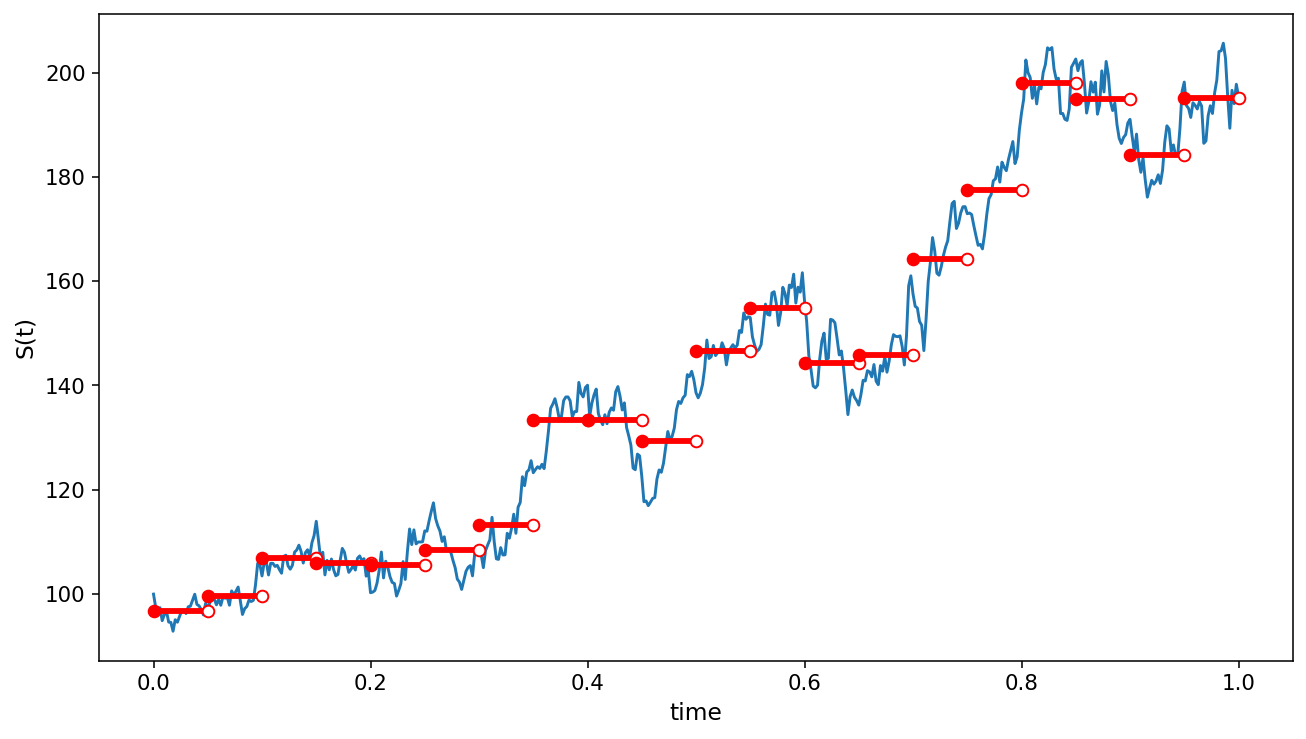

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import scipy.integrate as integrate

def GeneratePathsGBMABM(NoOfPaths,NoOfSteps,T,r,sigma,S_0):
    Z = np.random.normal(0.0,1.0,[NoOfPaths,NoOfSteps])
    X = np.zeros([NoOfPaths, NoOfSteps+1])
    time = np.zeros([NoOfSteps+1])

    X[:,0] = np.log(S_0)

    dt = T / float(NoOfSteps)
    for i in range(0,NoOfSteps):

        # Making sure that samples from a normal have mean 0 and variance 1

        if NoOfPaths > 1:
            Z[:,i] = (Z[:,i] - np.mean(Z[:,i])) / np.std(Z[:,i])
        X[:,i+1] = X[:,i] + (r - 0.5 * sigma * sigma) * dt + sigma * np.power(dt, 0.5)*Z[:,i]
        time[i+1] = time[i] +dt

    # Compute exponent of ABM

    S = np.exp(X)
    paths = {"time":time,"S":S}
    return paths

def mainCalculation():
    NoOfPaths = 1
    NoOfSteps = 500
    T         = 1
    r         = 0.05
    sigma     = 0.4
    S_0       = 100

    Paths = GeneratePathsGBMABM(NoOfPaths,NoOfSteps,T,r,sigma,S_0)
    timeGrid = Paths["time"]
    S = Paths["S"]

    plt.figure(1)
    plt.plot(timeGrid, np.transpose(S))
    plt.grid()
    plt.xlabel("time")
    plt.ylabel("S(t)")

    m          = 20
    pathNumber = 0
    f = interp1d(timeGrid, S[pathNumber,:])

    for k in range(1,m*T+1):
        tGrid = np.linspace(float((k-1))/m, float(k)/m, 100)
        g_m   = m * integrate.trapezoid(np.squeeze(f(tGrid)),np.squeeze(tGrid))
        plt.plot(tGrid,g_m * np.ones([len(tGrid),1]),'-r',linewidth=3.0)
        plt.plot(tGrid[0],g_m,'or')
        plt.plot(tGrid[-1],g_m,'or',markerfacecolor =[1,1,1])

    plt.show()

mainCalculation()